# Regression with a Crab Age dataset

"The dataset for this competition (both train and test) was generated from a deep learning model trained on the Crab Age Prediction dataset."

The **aim** is to predict the **age**.

**Features and Label**:

Sex: Gender of the Crab - Male, Female and Indeterminate
<br>Length: Length of the Crab in feet
<br>Diameter: Diameter of the Crab in feet
<br>Height: Height of the Crab in feet
<br>Weight: Weight of the Crab in ounces
<br>Shucked Weight: Weight without the shell in ounces
<br>Viscera Weight: Weight that wraps around the crab's abdominal organs in ounces
<br>Shell Weight: Weight of the Shell in ounces
<br>Age: Age of the Crab in months

**Sources**:

- [Kaggle challenge](https://www.kaggle.com/competitions/playground-series-s3e16/data?select=test.csv)
- [Original Dataset](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)

In [1]:
# importing standard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit

from xgboost import XGBRegressor

In [2]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'axes.titlesize': 16,
    'figure.figsize': (12, 4),
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('colorblind'), 
              rc=theme_parameters)

# Read Data

In [3]:
read_from_kaggle = False

In [4]:
if read_from_kaggle:
    
    data = pd.read_csv('',
                       index_col=0)
    orig_data = pd.read_csv('',
                            index_col=0)
    
    
else:

    train_data = pd.read_csv("./../data/crab_age_train.csv",
                             index_col=0)
    test_data = pd.read_csv("./../data/crab_age_test.csv",
                            index_col=0)
    orig_data = pd.read_csv("./../data/crab_age_original.csv")

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [6]:
train_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49368 entries, 74051 to 123418
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.4+ MB


In [8]:
test_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [9]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [10]:
orig_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


## Defining Categorical Dtype

In [11]:
# List of datasets
datasets = [train_data, test_data, orig_data]

# Columns to convert to categorical
columns = ['Sex']

for dataset in datasets:
    for column in columns:
        dataset[column] = dataset[column].astype('category')

# EDA - Exploratory Data Analysis

## Numeric Feature Distribution Train vs Test vs Original Data KDEs

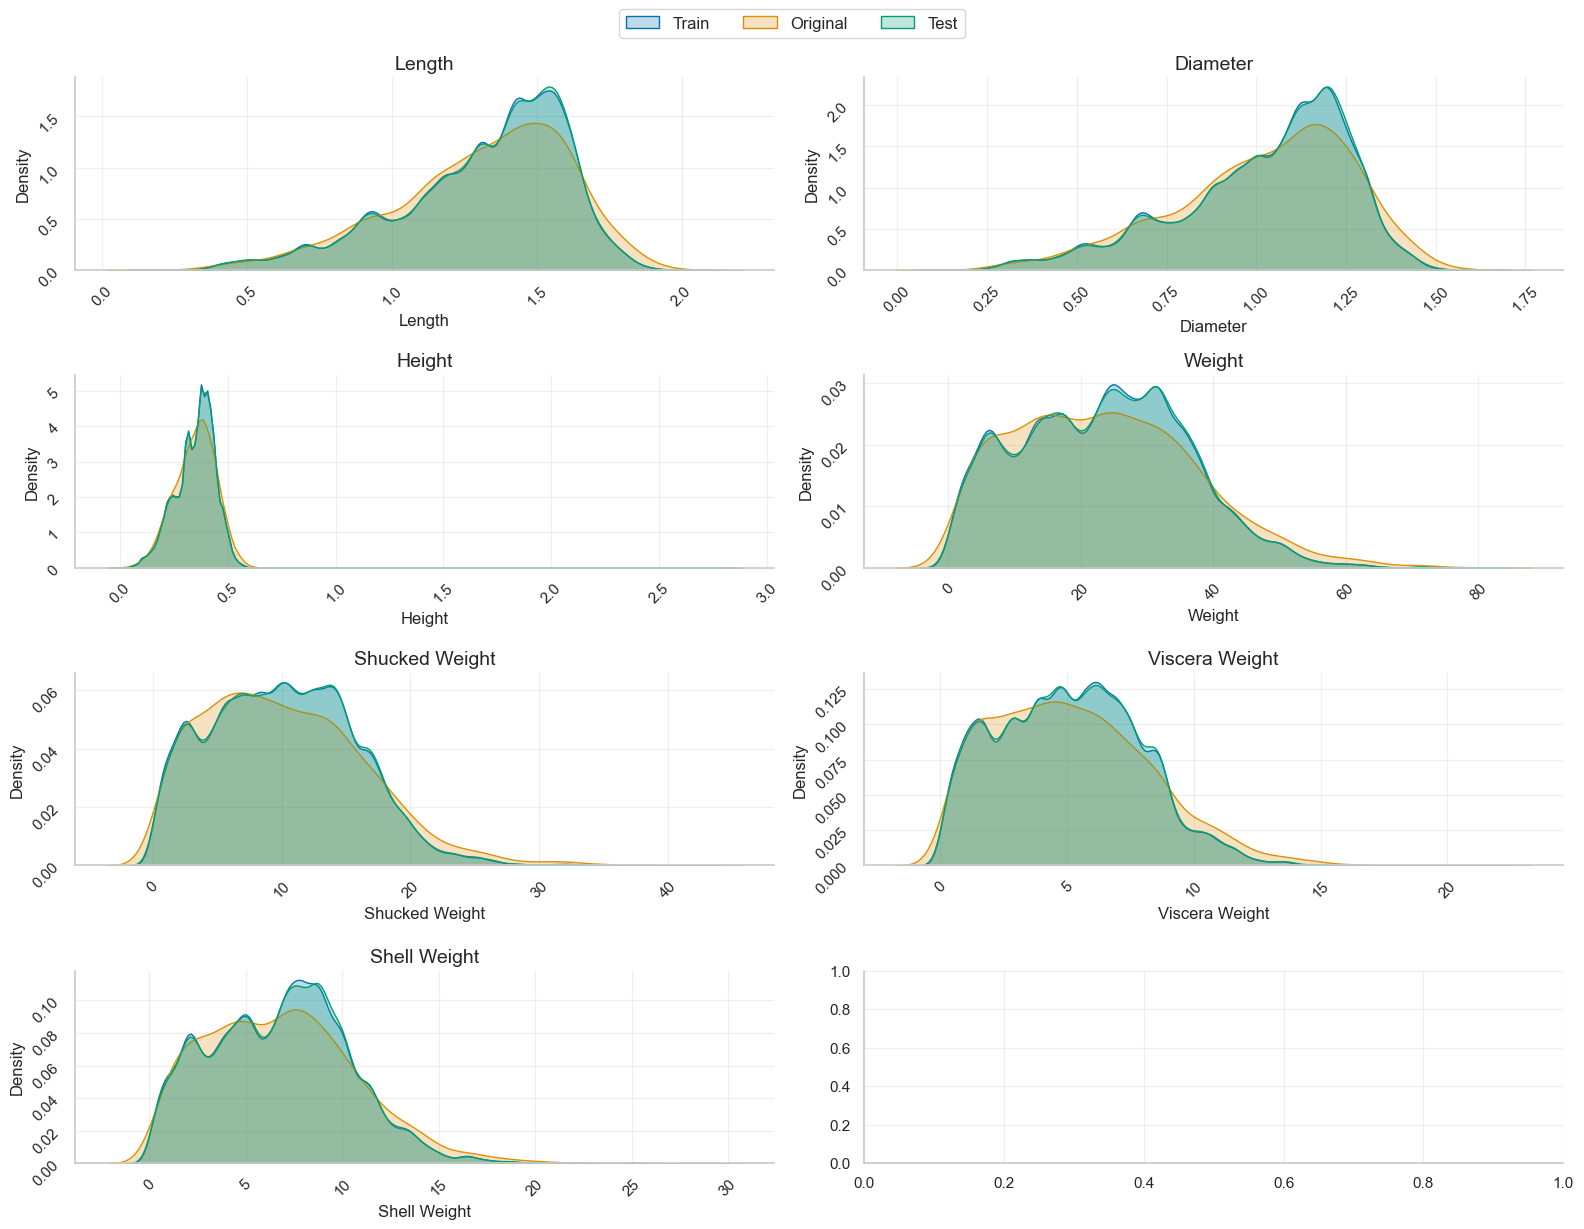

In [12]:
figure, ax = plt.subplots(4, 2, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

for index, col_name in enumerate([col for idx, col in enumerate(train_data.columns) if idx not in exclude_indices]):
    
    sns.kdeplot(data=train_data[col_name],
                label='Train',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=orig_data[col_name],
                label='Original',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=test_data[col_name],
                label='Test',
                fill=True,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=3)

plt.tight_layout()
plt.show()

## Numeric Feature Distribution Challenge vs Original Data KDEs

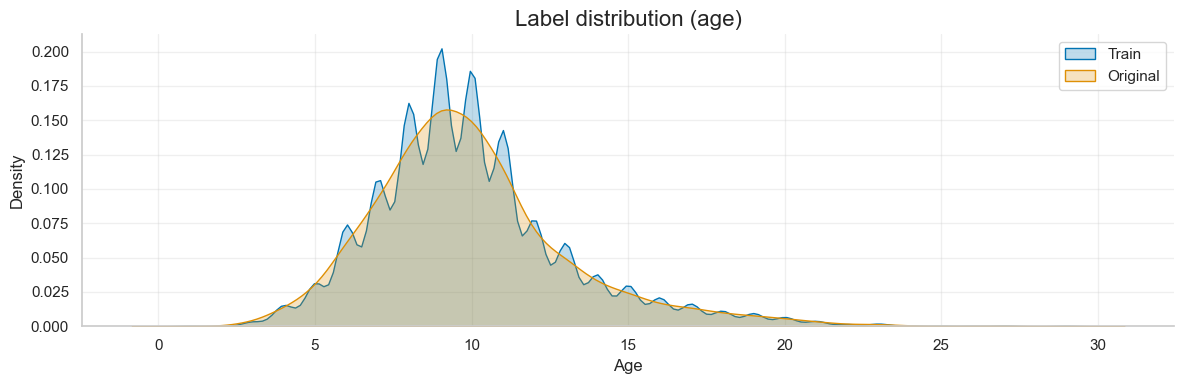

In [13]:
sns.kdeplot(data=train_data['Age'],
            label='Train',
            fill=True)

sns.kdeplot(data=orig_data['Age'],
            label='Original',
            fill=True)

plt.title('Label distribution (age)')

plt.legend()

plt.tight_layout()
plt.show()

## Categorical Features

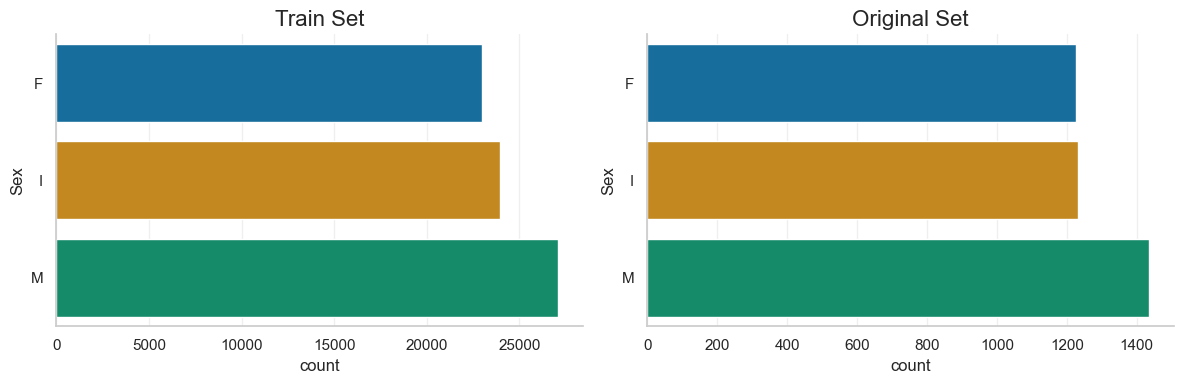

In [14]:
figure, ax = plt.subplots(1, 2, figsize=(12, 4))
ax = ax.flatten()

sns.countplot(data=train_data.sort_values('Sex'), 
              y="Sex",
              ax=ax[0])

sns.countplot(data=orig_data.sort_values('Sex'), 
              y="Sex",
              ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Original Set')

plt.tight_layout()
plt.show()

## Boxplot Numerical Features vs Sex

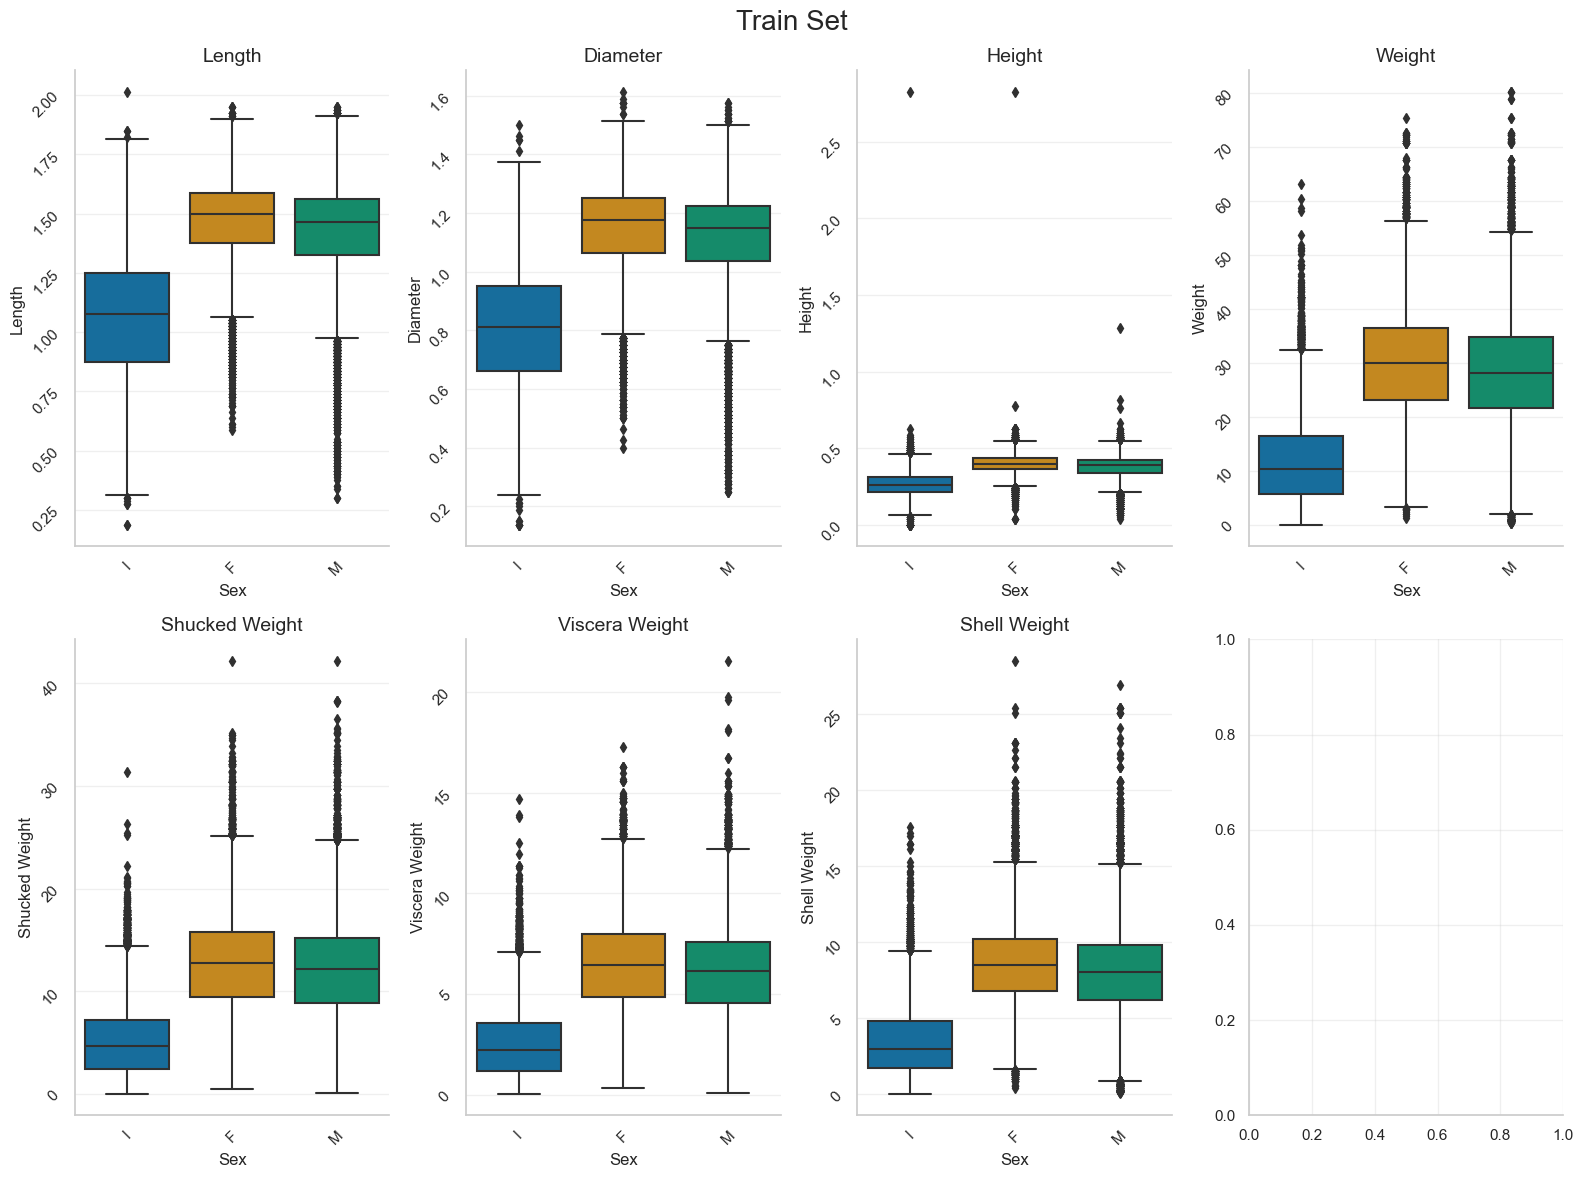

In [15]:
figure, ax = plt.subplots(2, 4, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

# Sex order
sex_order = ['I', 'F', 'M']

for index, col_name in enumerate([col for idx, col in enumerate(orig_data.columns) if idx not in exclude_indices]):
    
    sns.boxplot(data=train_data,
                x='Sex',
                y=col_name,
                order=sex_order,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.suptitle('Train Set', fontsize=20)
    
plt.tight_layout()
plt.show()

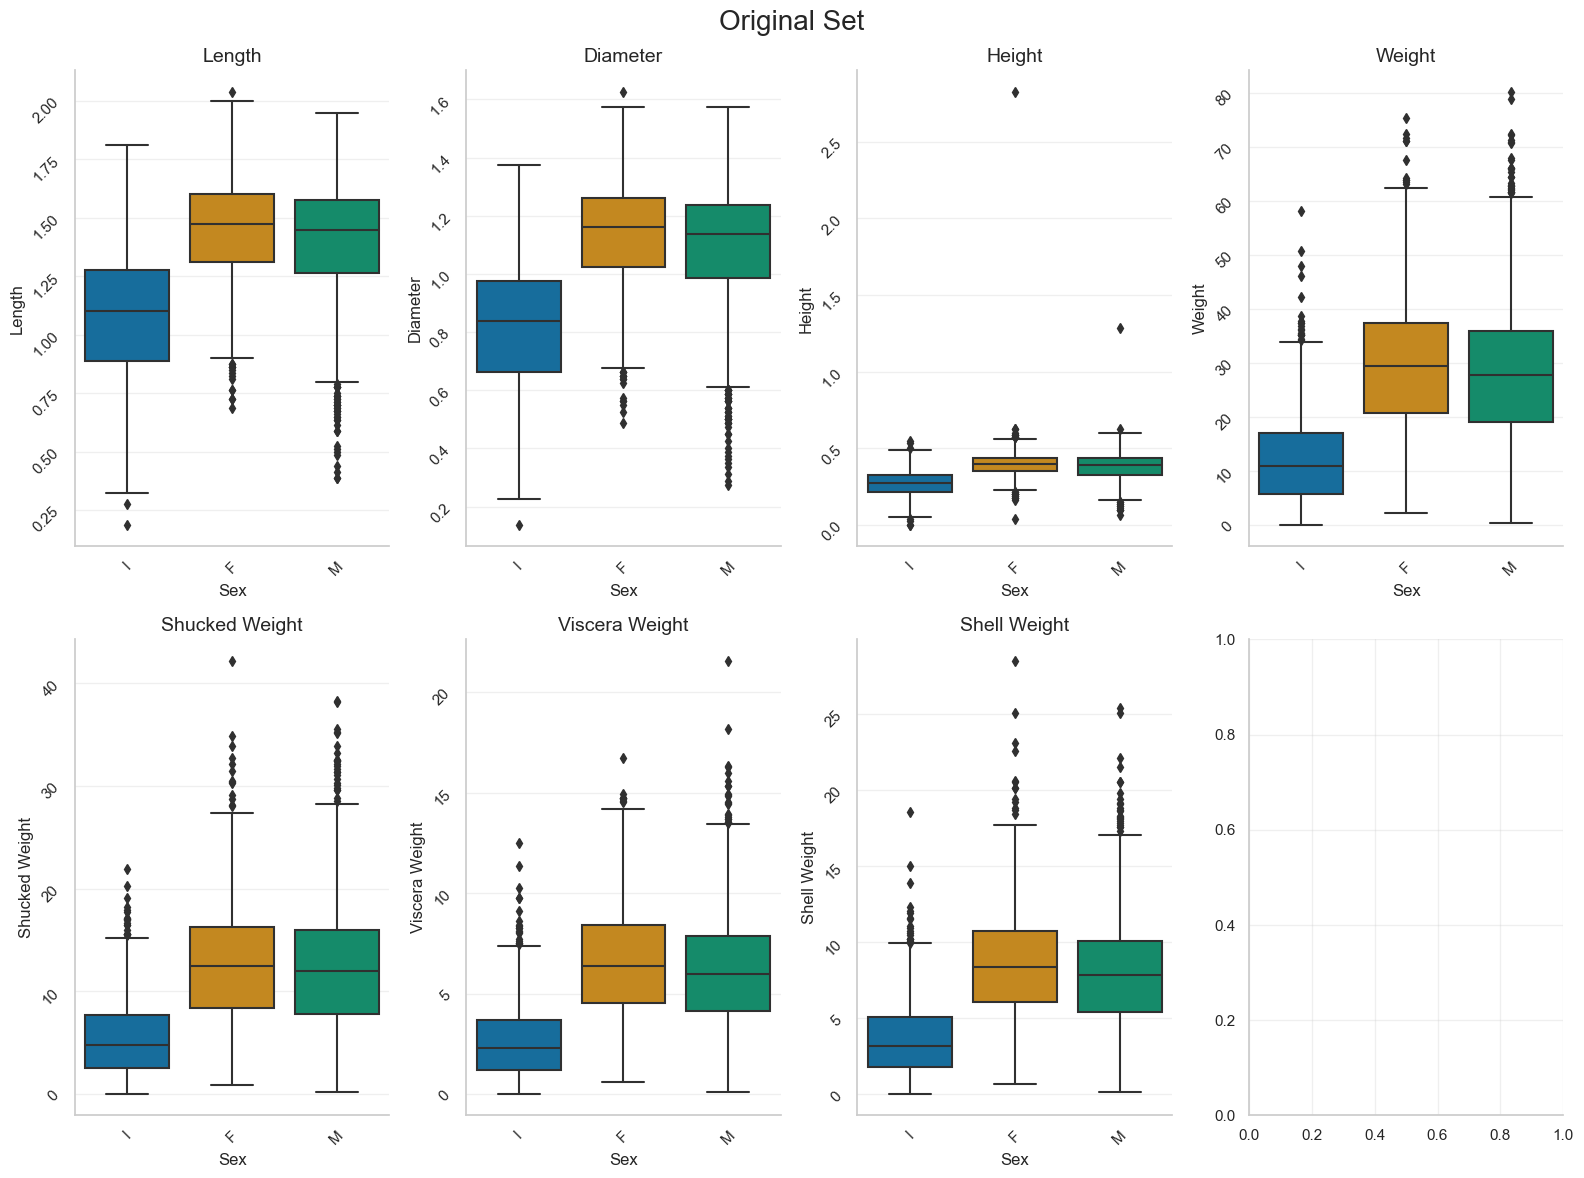

In [16]:
figure, ax = plt.subplots(2, 4, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

# Sex order
sex_order = ['I', 'F', 'M']

for index, col_name in enumerate([col for idx, col in enumerate(orig_data.columns) if idx not in exclude_indices]):
    
    sns.boxplot(data=orig_data,
                x='Sex',
                y=col_name,
                order=sex_order,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.suptitle('Original Set', fontsize=20)
    
plt.tight_layout()
plt.show()

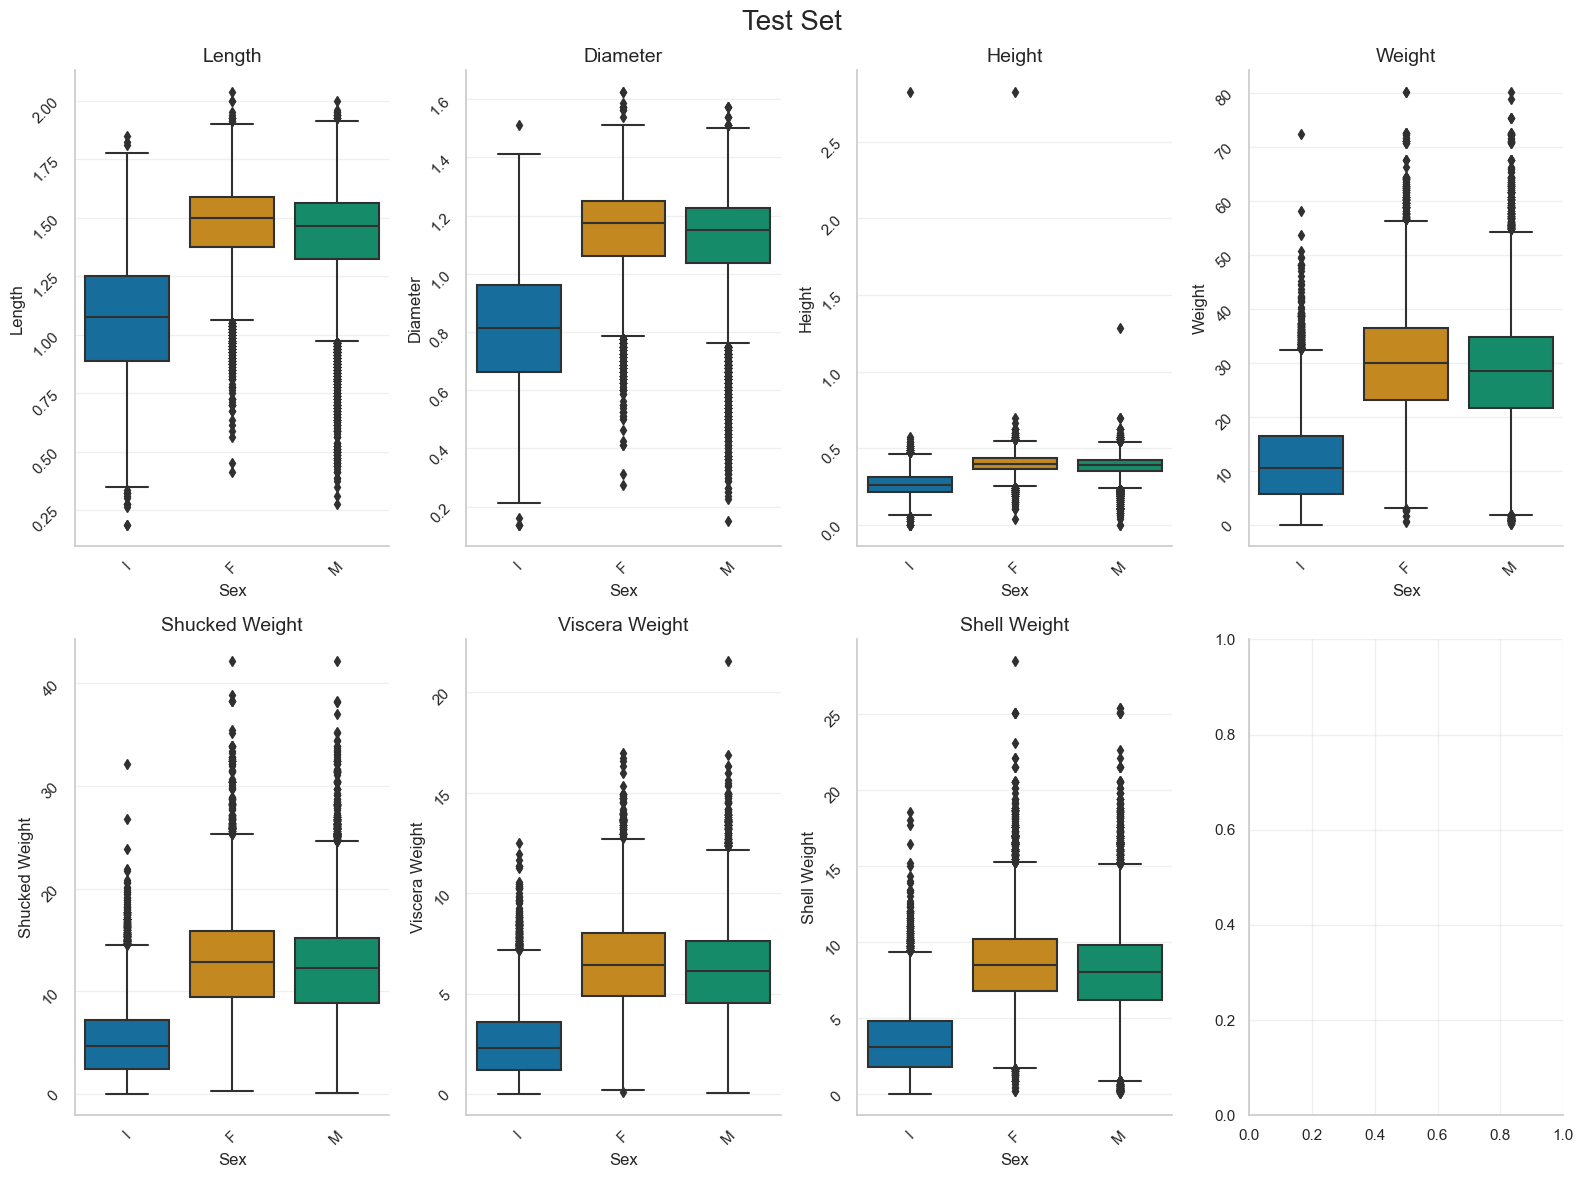

In [17]:
figure, ax = plt.subplots(2, 4, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

# Sex order
sex_order = ['I', 'F', 'M']

for index, col_name in enumerate([col for idx, col in enumerate(orig_data.columns) if idx not in exclude_indices]):
    
    sns.boxplot(data=test_data,
                x='Sex',
                y=col_name,
                order=sex_order,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.suptitle('Test Set', fontsize=20)
    
plt.tight_layout()
plt.show()

## Boxplot Label vs Sex

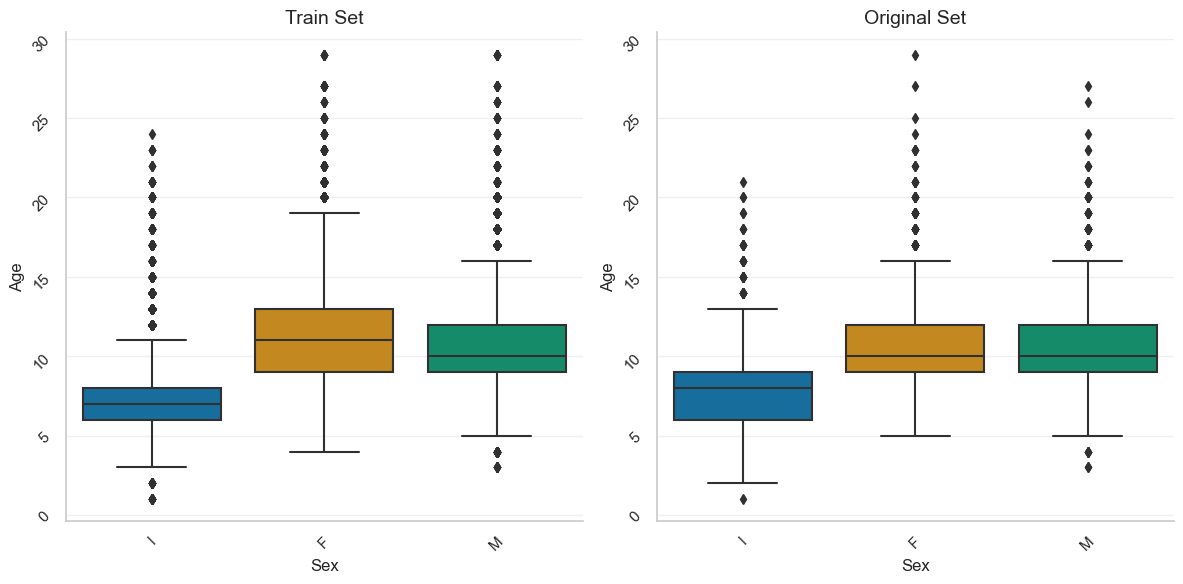

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax.flatten()

data = [train_data, orig_data]
titles = ['Train Set', 'Original Set']

# Sex order
sex_order = ['I', 'F', 'M']

for index, dataset in enumerate(data):
    sns.boxplot(data=dataset,
                x='Sex',
                y='Age',
                order=sex_order,
                ax=ax[index])
    
    ax[index].set_title(str(titles[index]), fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

## Pearson vs Spearman Correlation Matrix

In [19]:
train_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [20]:
# Define columns to use in correlation matrix
corr_columns = ['Length', 
                'Diameter', 
                'Height', 
                'Weight', 
                'Shucked Weight',
                'Viscera Weight', 
                'Shell Weight']

corr_columns_test = ['Length', 
                     'Diameter', 
                     'Height', 
                     'Weight', 
                     'Shucked Weight',
                     'Viscera Weight', 
                     'Shell Weight']

In [21]:
# Generate correlation matrix train set
correlation_train = train_data[corr_columns].corr(method='pearson')

# Generate a mask for the upper triangle
correlation_mask_train = np.triu(np.ones_like(correlation_train, dtype=bool))

# Generate correlation matrix original set
correlation_orig = orig_data[corr_columns].corr(method='pearson')

# Generate a mask for the upper triangle
correlation_mask_orig = np.triu(np.ones_like(correlation_orig, dtype=bool))

# Generate correlation matrix test set
correlation_test = test_data[corr_columns_test].corr(method='pearson')

# Generate a mask for the upper triangle
correlation_mask_test = np.triu(np.ones_like(correlation_test, dtype=bool))

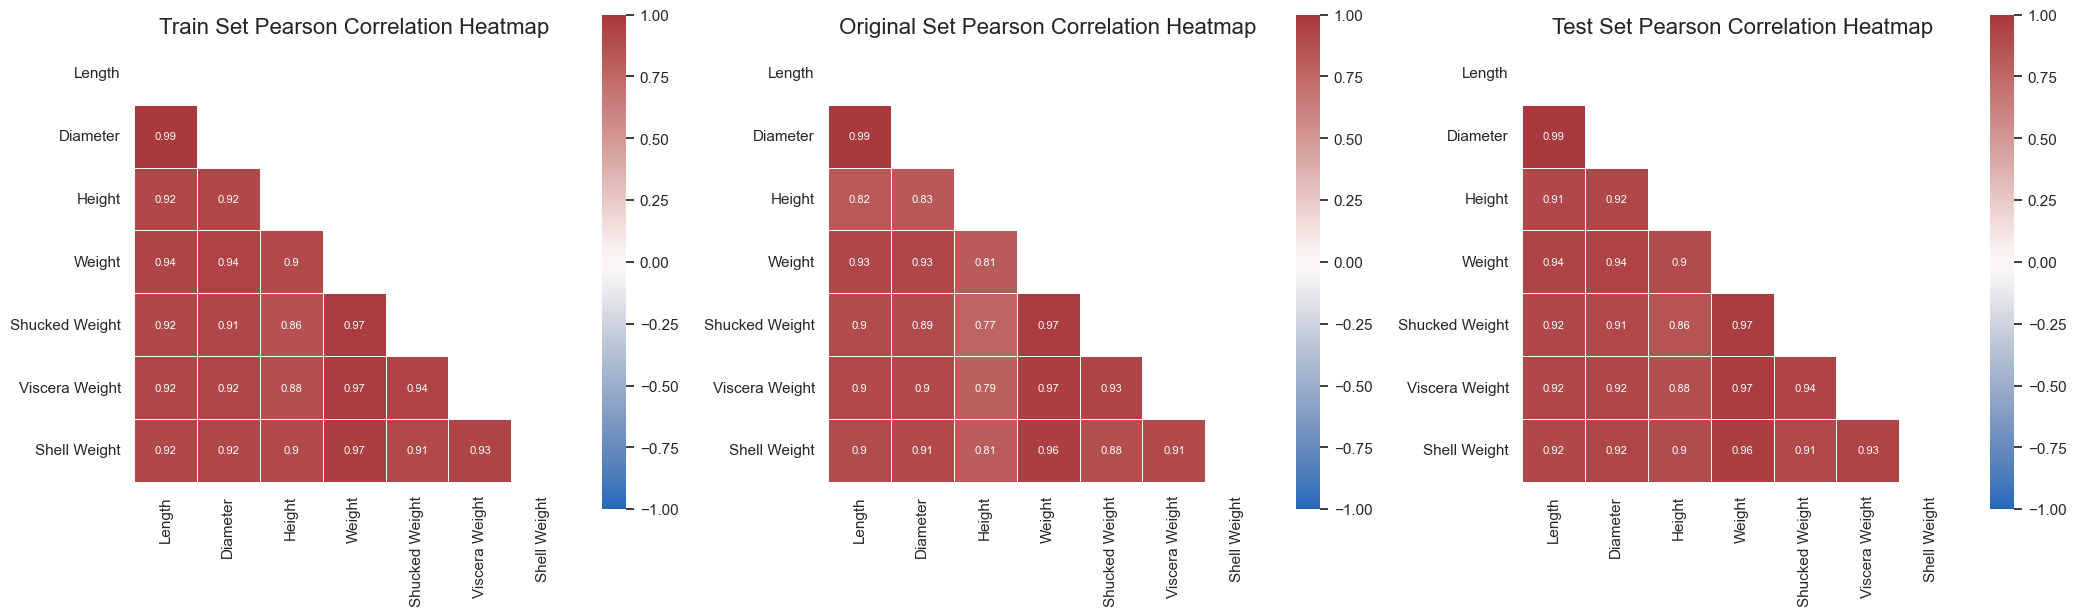

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax = ax.flatten()

# Define lost to iterate on
datasets = [(correlation_train, correlation_mask_train, 'Train Set Pearson Correlation Heatmap'),
            (correlation_orig, correlation_mask_orig, 'Original Set Pearson Correlation Heatmap'),
            (correlation_test, correlation_mask_test, 'Test Set Pearson Correlation Heatmap')]

for i, (correlation_data, correlation_mask, title) in enumerate(datasets):
    sns.heatmap(correlation_data,
                mask=correlation_mask,
                cmap='vlag',
                vmax=1.0,
                vmin=-1.0,
                center=0,
                square=True,
                linewidths=.5,
                annot=True,
                annot_kws={'fontsize': 8},
                cbar_kws={"shrink": .8, 'orientation': 'vertical'},
                ax=ax[i])
    ax[i].set_title(title)
    
plt.tight_layout()
plt.show()

## Spearman Correlation Matrix

In [23]:
# Generate correlation matrix train set
correlation_train = train_data[corr_columns].corr(method='spearman')

# Generate a mask for the upper triangle
correlation_mask_train = np.triu(np.ones_like(correlation_train, dtype=bool))

# Generate correlation matrix original set
correlation_orig = orig_data[corr_columns].corr(method='spearman')

# Generate a mask for the upper triangle
correlation_mask_orig = np.triu(np.ones_like(correlation_orig, dtype=bool))

# Generate correlation matrix test set
correlation_test = test_data[corr_columns_test].corr(method='spearman')

# Generate a mask for the upper triangle
correlation_mask_test = np.triu(np.ones_like(correlation_test, dtype=bool))

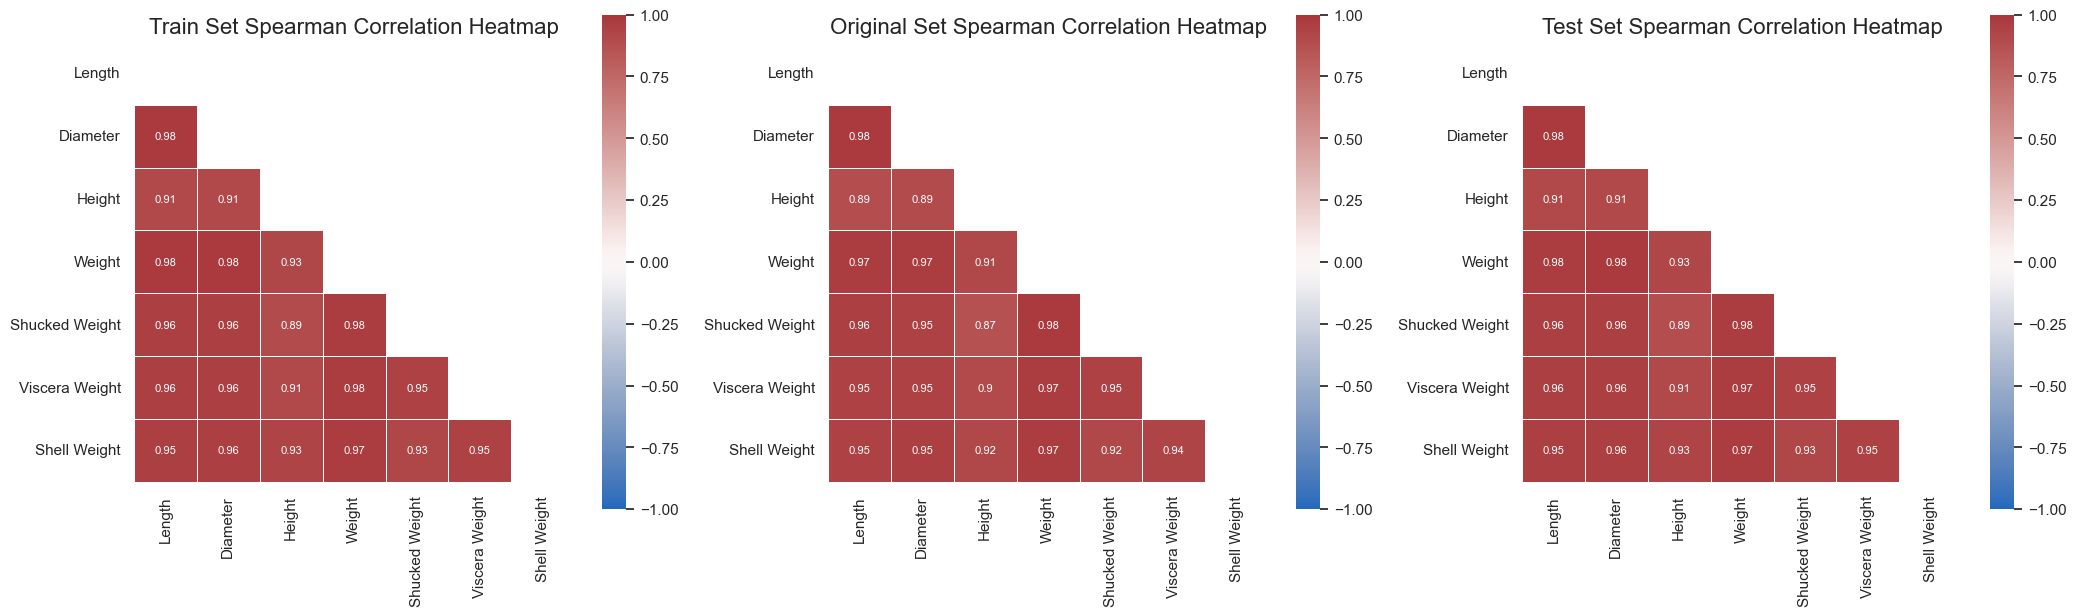

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax = ax.flatten()

# Define lost to iterate on
datasets = [(correlation_train, correlation_mask_train, 'Train Set Spearman Correlation Heatmap'),
            (correlation_orig, correlation_mask_orig, 'Original Set Spearman Correlation Heatmap'),
            (correlation_test, correlation_mask_test, 'Test Set Spearman Correlation Heatmap')]

for i, (correlation_data, correlation_mask, title) in enumerate(datasets):
    sns.heatmap(correlation_data,
                mask=correlation_mask,
                cmap='vlag',
                vmax=1.0,
                vmin=-1.0,
                center=0,
                square=True,
                linewidths=.5,
                annot=True,
                annot_kws={'fontsize': 8},
                cbar_kws={"shrink": .8, 'orientation': 'vertical'},
                ax=ax[i])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

## Pairplots

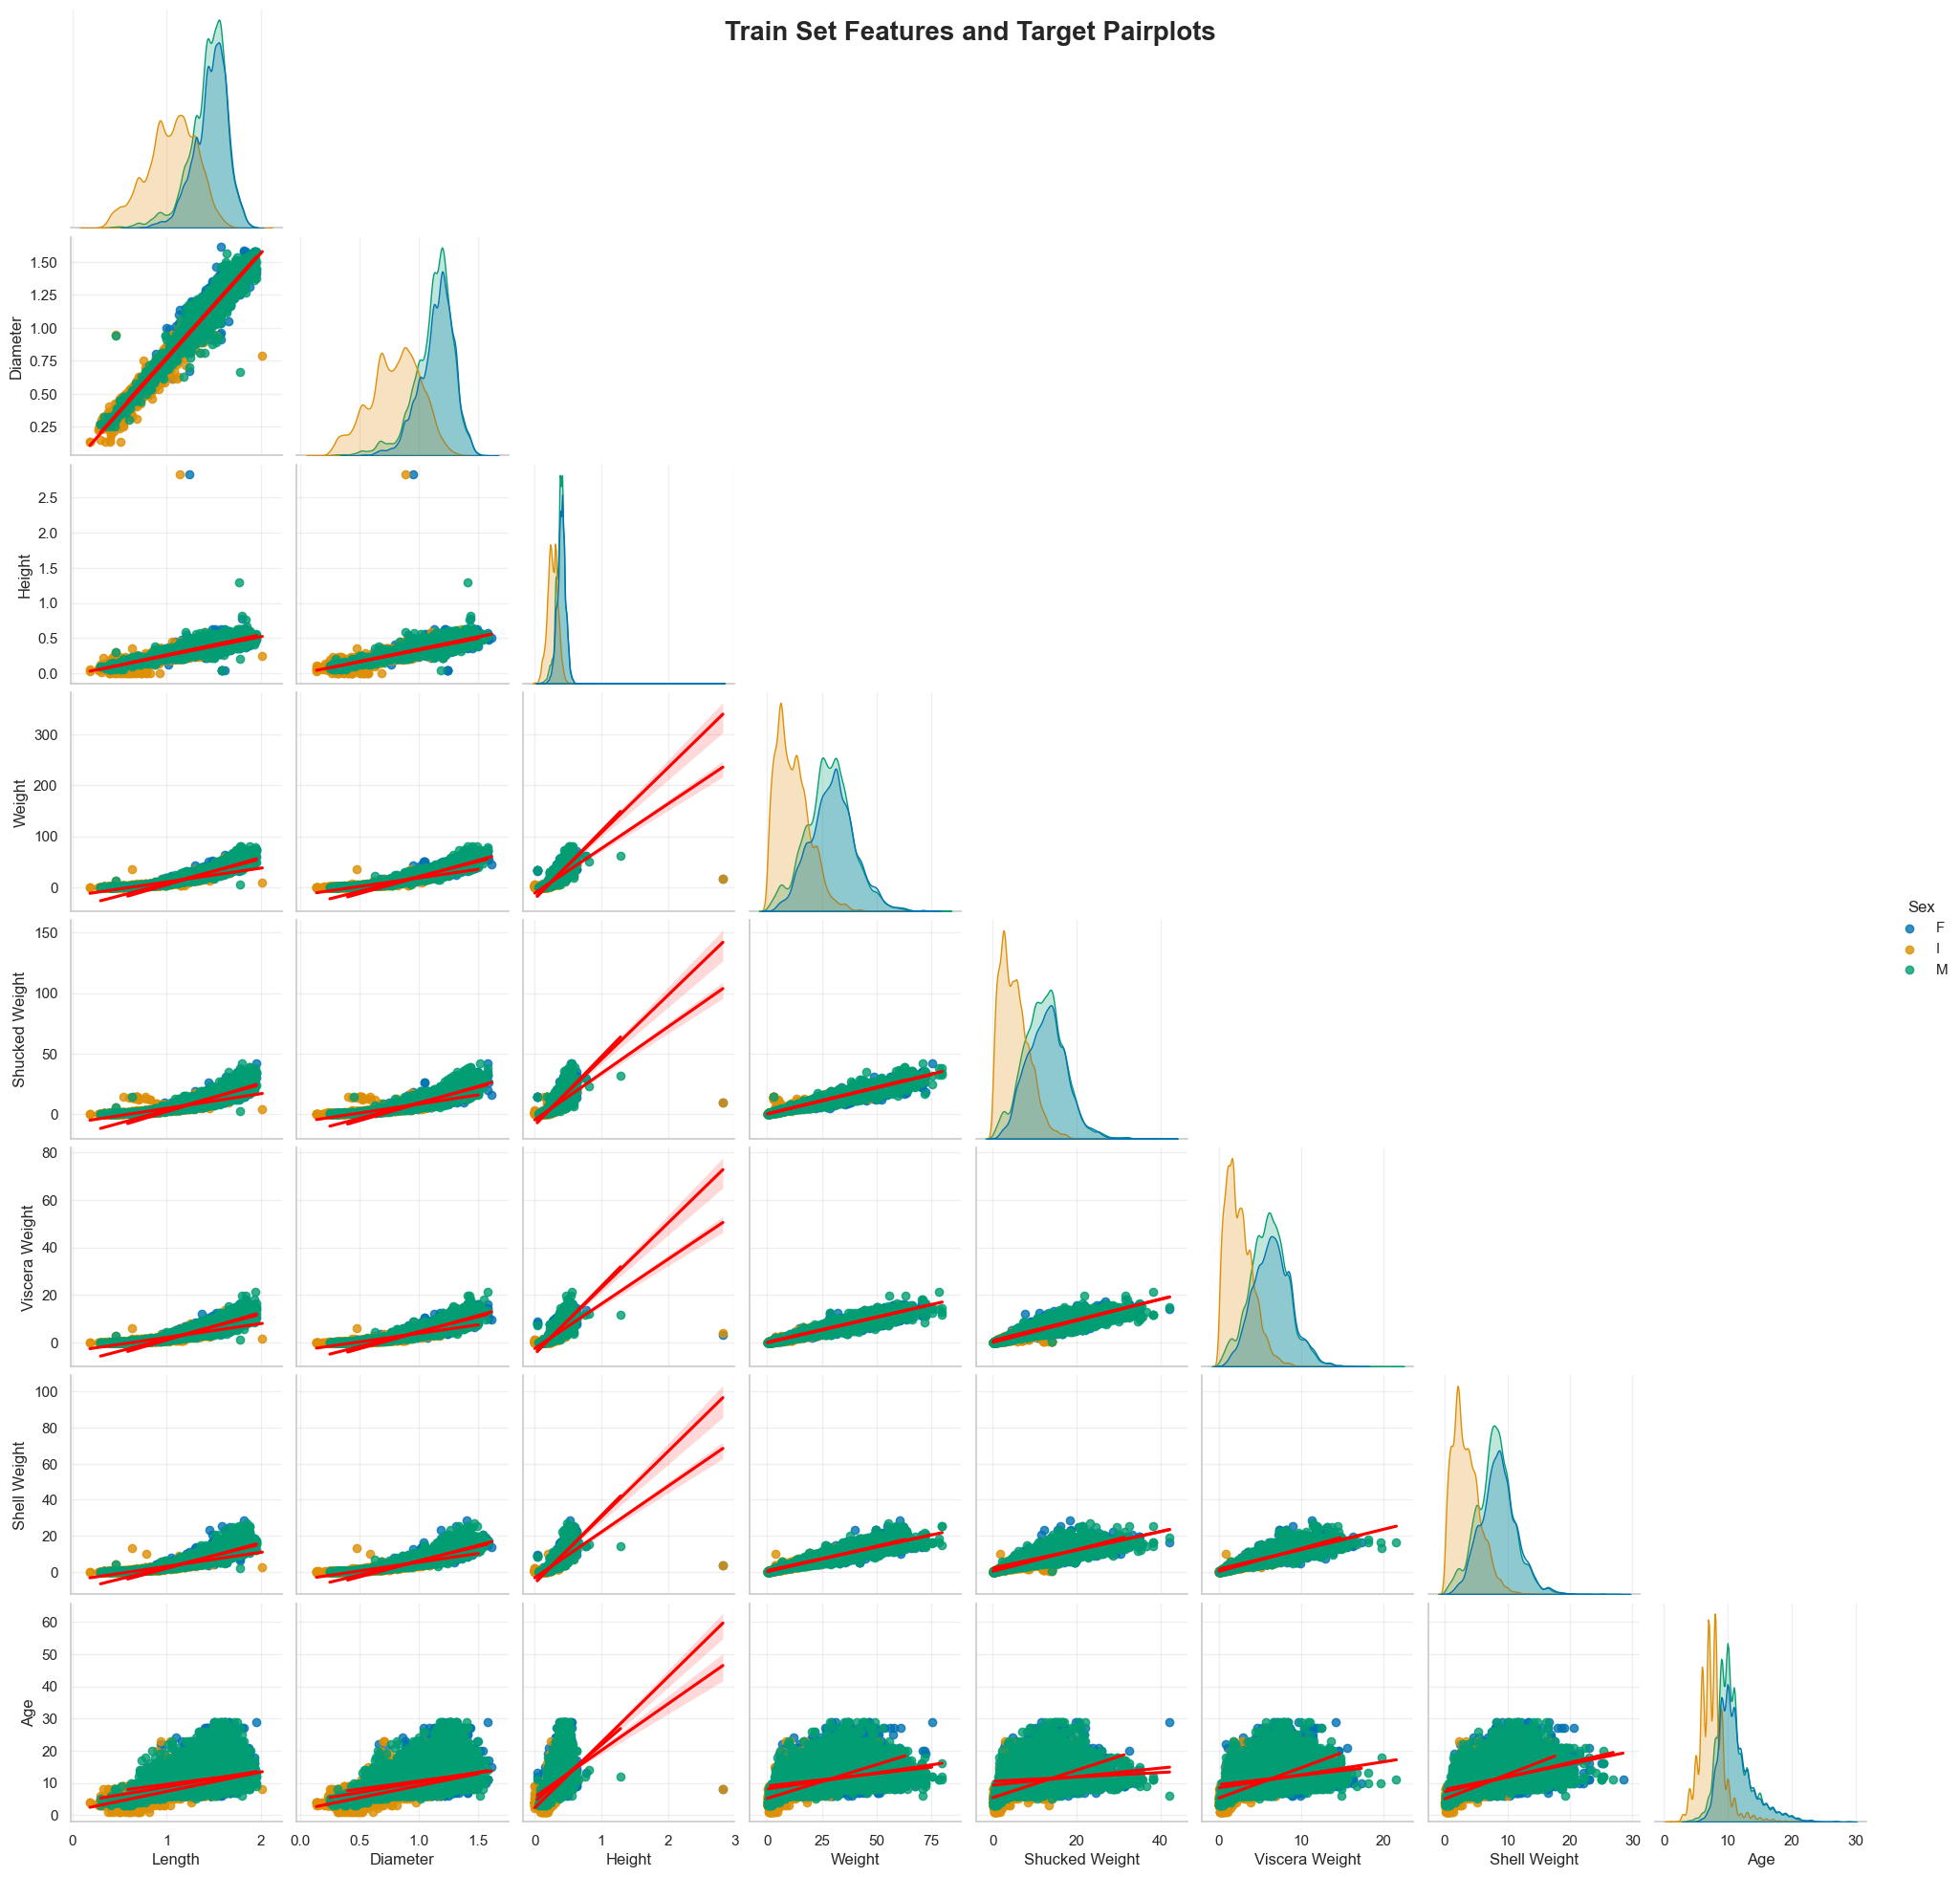

In [52]:
sns.pairplot(train_data,
             hue='Sex',
             kind="reg",
             diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}},
             corner=True)

plt.suptitle('Train Set Features and Target Pairplots', 
             fontsize=20, 
             fontweight='bold')

plt.show()

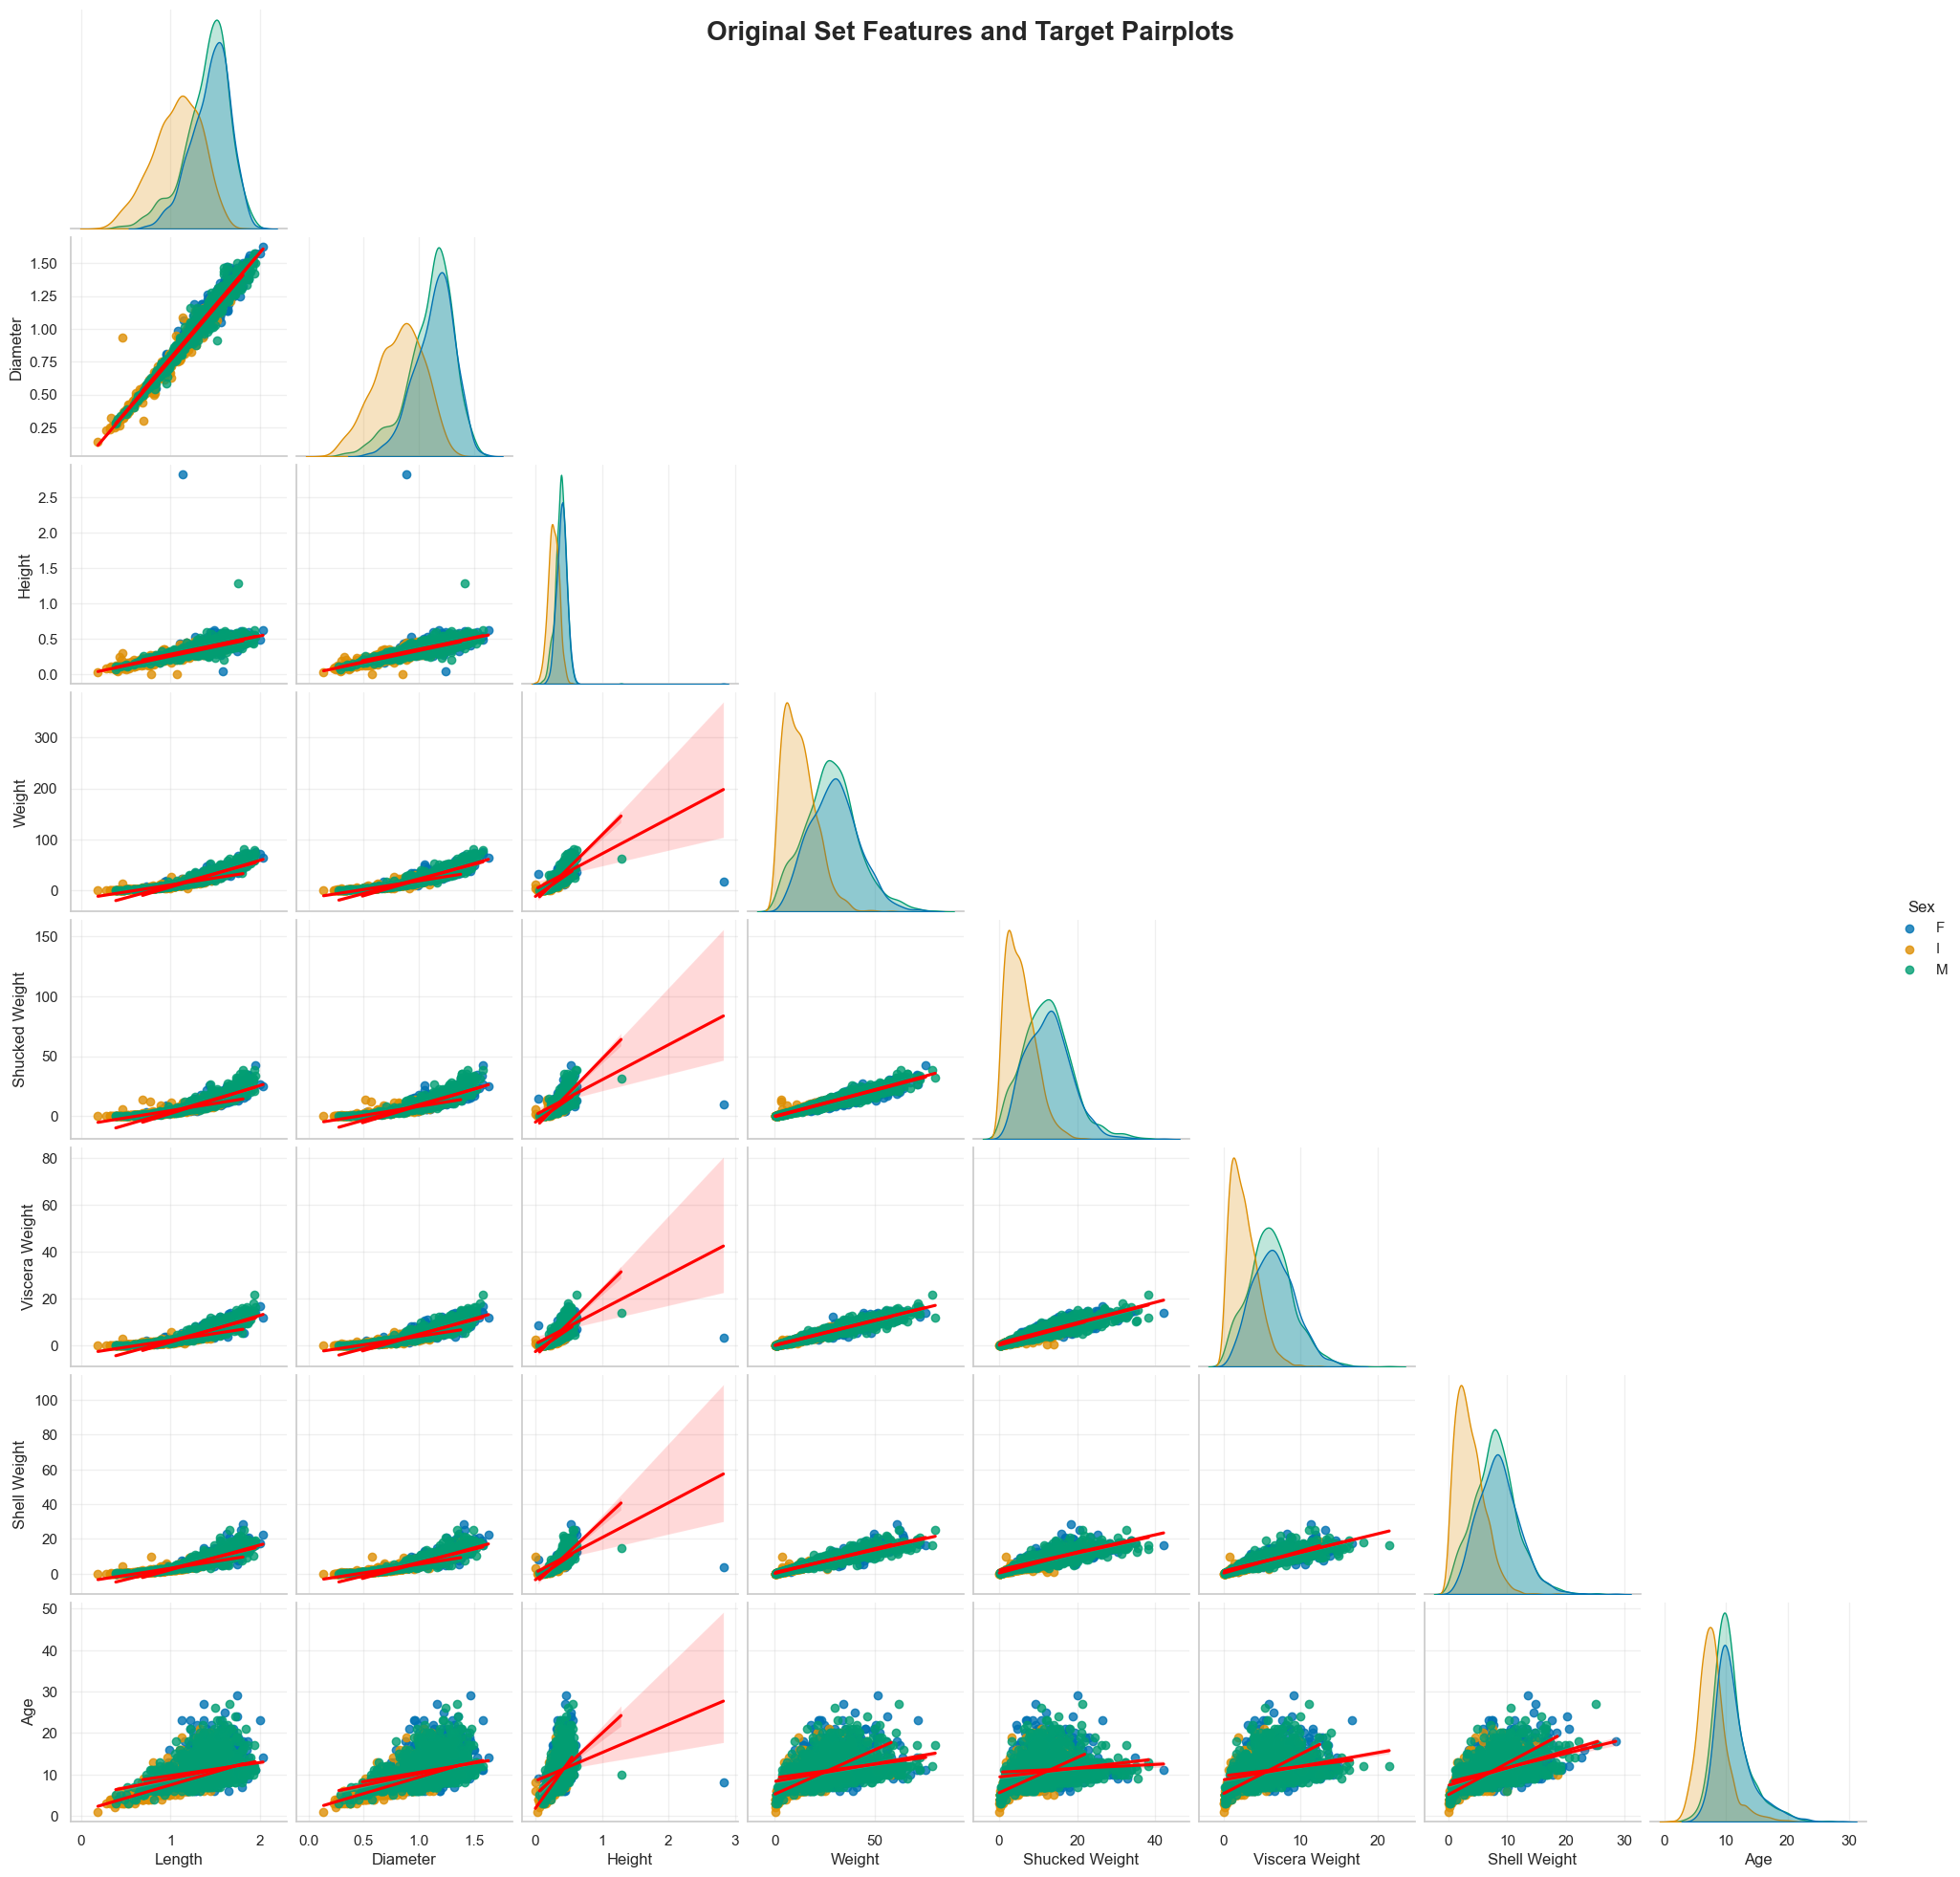

In [53]:
sns.pairplot(orig_data,
             hue='Sex',
             kind="reg",
             diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}},
             corner=True)

plt.suptitle('Original Set Features and Target Pairplots', 
             fontsize=20, 
             fontweight='bold')

plt.show()

# Preprocessing Data Before Modeling